In [263]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [264]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        print(gpus[0])
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
        
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     print(gpus[0])
#     tf.config.experimental.set_virtual_device_configuration(
#         gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
#   except RuntimeError as e:
#     print(e)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
1 Physical GPUs, 1 Logical GPUs


In [265]:
train_data = np.genfromtxt('nav_robot_train.csv', delimiter=',')
max_0 = 360
max_1 = 250
max_2 = 270
train_data

array([[339.71744091,  98.08159868, 180.        ],
       [200.44954761,  62.96824597,   0.        ],
       [242.43487469, 179.35997324,   0.        ],
       ...,
       [ 89.58780726, 139.00359708, -90.        ],
       [ 86.86364163, 146.21901381, -90.        ],
       [ 94.42697165, 155.46382216, -90.        ]])

In [266]:
tf.keras.utils.to_categorical([0, 0.5, 1], num_classes=3)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [267]:
y = np.delete(train_data, [0,1], 1)
y_max = np.array([90])
y = (y + 90) / y_max
from keras.utils.np_utils import to_categorical
y_cat = to_categorical(y, num_classes=4)
# # np.concatenate([y,y_cat], 1)[:60]
y_cat[:60]

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],


[5.92918787 3.49850459 4.23128679]
[0.39232639 0.25187298 0.71743989]


Text(0.5, 1.0, '5x5 grid world and first move data')

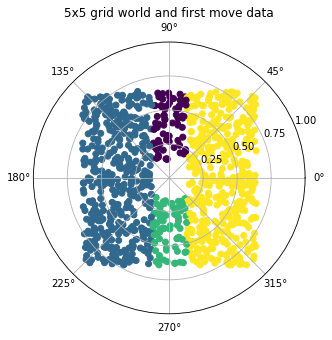

In [268]:
x = np.delete(train_data, 2, 1)
x = x / np.array([180, max_1]) * np.array([np.pi, 1])
# x[:10]

print(x[:3, 0])
print(x[:3, 1])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='polar')

categories = np.unique(y)
colors = np.linspace(0,1,len(categories))
colordict = dict(zip(categories, colors))
color_map = list(map(lambda x: colordict[x], y.flatten().tolist()))

ax.scatter(x[:, 0], x[:, 1], c=color_map)
ax.set_rticks([0.25, 0.5, 0.75, 1.0])  # Less radial ticks
ax.grid(True)

ax.set_title("5x5 grid world and first move data")

Text(0.5, 1.0, '5x5 grid world and first move data')

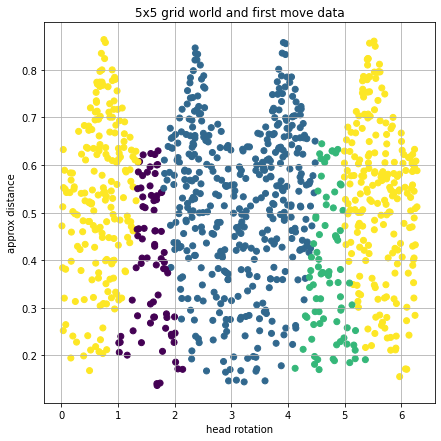

In [269]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.scatter(x[:, 0], x[:, 1], c=color_map)
ax.grid(True)
ax.set_xlabel('head rotation')
ax.set_ylabel('approx distance')
ax.set_title("5x5 grid world and first move data")

In [270]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(2,), activation='tanh'))
model.add(tf.keras.layers.Dense(16, activation='tanh'))
model.add(tf.keras.layers.Dense(8, activation='tanh'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [271]:
N=500
history = model.fit(x / np.array([2 * np.pi, 1]), y_cat, verbose=0, epochs=N)

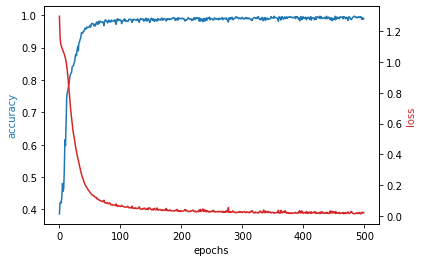

In [272]:
loss = history.history['loss']
acc = history.history['accuracy']
xdata = history.epoch

fig, ax1 = plt.subplots()
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy', color='tab:blue')
ax1.plot(xdata, acc, color='tab:blue')
ax2 = ax1.twinx()
ax2.set_ylabel('loss', color='tab:red')
ax2.plot(xdata, loss, color='tab:red')

In [273]:
test_data = np.genfromtxt('nav_robot_test.csv', delimiter=',')
test_data

array([[ 62.10272897,  76.94153625, 180.        ],
       [199.30630034, 166.355042  ,   0.        ],
       [169.07719528, 116.10340219,   0.        ],
       ...,
       [289.55825154,  80.65358021,  90.        ],
       [ 99.59890307, 137.93114224, -90.        ],
       [206.33768817, 112.69871339,   0.        ]])

In [274]:
eval_x = np.delete(test_data, 2, 1)
# eval_x = eval_x / x_max
eval_x[:10]

array([[ 62.10272897,  76.94153625],
       [199.30630034, 166.355042  ],
       [169.07719528, 116.10340219],
       [140.64054943, 115.10864433],
       [  0.46962702, 122.00409829],
       [214.28687698, 133.13526956],
       [ 59.42077313, 102.21545871],
       [114.71079946, 124.39051411],
       [ 33.50343698,  85.14693183],
       [226.5154079 , 133.68993979]])

In [275]:
eval_y = np.delete(test_data, [0,1], 1)
eval_y = (eval_y + 90) / y_max
eval_y[:10]

array([[3.],
       [1.],
       [1.],
       [1.],
       [3.],
       [1.],
       [3.],
       [1.],
       [3.],
       [1.]])

In [276]:
prediction = model.predict(eval_x)
prediction[:5]
# np.concatenate([prediction[:10], eval_y[:10]], 1)

32/32 [==============================] - 0s 2ms/step


array([[2.9129442e-11, 2.6630621e-08, 2.0832681e-06, 9.9999797e-01],
       [2.9349561e-11, 2.6806177e-08, 2.0994769e-06, 9.9999785e-01],
       [2.9349561e-11, 2.6806177e-08, 2.0994769e-06, 9.9999785e-01],
       [2.9349561e-11, 2.6806177e-08, 2.0994769e-06, 9.9999785e-01],
       [6.3618434e-05, 9.9990356e-01, 3.2802473e-05, 1.1851800e-10]],
      dtype=float32)

In [277]:
p = np.argmax(prediction, axis=-1)
np.concatenate([p[..., None], eval_y], 1)[:30]

array([[3., 3.],
       [3., 1.],
       [3., 1.],
       [3., 1.],
       [1., 3.],
       [3., 1.],
       [3., 3.],
       [3., 1.],
       [3., 3.],
       [3., 1.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 1.],
       [3., 3.],
       [3., 3.],
       [3., 2.],
       [3., 1.],
       [3., 3.],
       [3., 1.],
       [3., 2.],
       [3., 3.],
       [3., 1.],
       [3., 3.],
       [3., 3.],
       [3., 1.],
       [3., 3.],
       [3., 1.],
       [3., 3.],
       [3., 3.]])

In [278]:
model.weights

[<tf.Variable 'dense_35/kernel:0' shape=(2, 32) dtype=float32, numpy=
 array([[-3.7804568e-01, -4.3489629e-01,  1.0093073e+00, -1.0470790e+00,
         -8.2809940e-02, -5.4271674e-01, -7.0111215e-01, -6.7872488e-01,
          5.6918310e-05,  1.7862950e-01, -7.3275447e-01,  2.6358166e-01,
          6.8091255e-01, -5.2764529e-01,  6.3491601e-01,  8.2192862e-01,
         -3.0672958e-01, -5.1884234e-01, -8.1448632e-01,  3.9416382e-01,
         -3.3723140e-01, -8.1198031e-01, -2.6377925e-01,  5.0640368e-01,
         -4.6093920e-01,  2.2646907e-01,  2.4715999e-01,  2.1441337e-03,
          8.0845439e-01,  2.7894393e-01,  5.7315743e-01,  4.6500677e-01],
        [ 2.5593439e-01, -3.9530358e-01, -2.8499585e-01, -1.4686345e-02,
          3.6248952e-01, -3.1996173e-01, -2.7893025e-01, -9.6793137e-02,
          2.9417697e-01,  5.8325881e-01,  4.1501963e-01, -7.4313855e-01,
          3.2308206e-02,  2.4455898e-02, -5.6435991e-02,  1.0043919e-01,
         -4.9878803e-01, -1.6652901e-01, -2.4778214e-

In [279]:
x_ticks = 100
x_range = np.linspace(0, 1, x_ticks)
y_ticks = 100
y_range = np.linspace(0, 1, y_ticks)
xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
zz = [np.argmax(model.predict(np.array([[xx[i][j], yy[i,j]] for i in range(x_ticks)]), verbose=0), axis=-1).flatten() for j in range(y_ticks)]
z = np.transpose(np.array(zz))
z

array([[0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       ...,
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3]], dtype=int64)

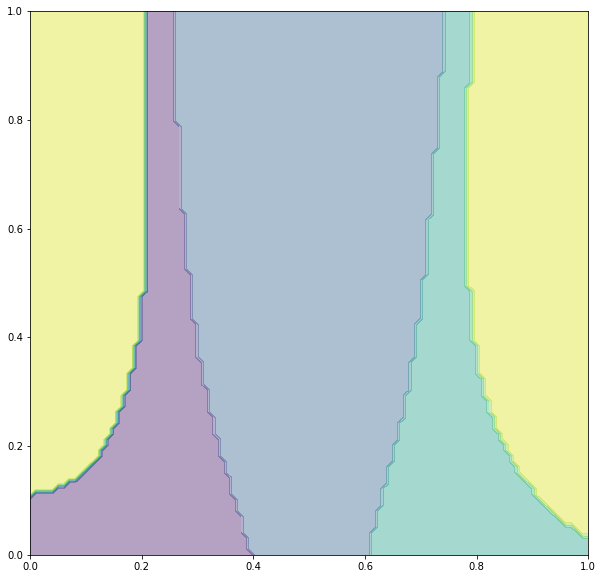

In [280]:
plt.figure(figsize=(10,10))
# plt.axis('scaled')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.contourf(xx, yy, z, alpha=0.4)

In [261]:
model.save('navigation.1.model')

INFO:tensorflow:Assets written to: navigation.1.model\assets
